In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"


import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

Boston Housing Prices Dataset: https://github.com/scikit-learn/scikit-learn/blob/7813f7efb5b2012412888b69e73d76f2df2b50b6/sklearn/datasets/data/boston_house_prices.csv

## load boston data from sklearn.datasets

In [2]:
from sklearn.datasets import load_boston

In [3]:
features = pandas.DataFrame(load_boston().data)   # load_boston().data contains features 12 to be exact and one label/target
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
label = pandas.DataFrame(load_boston().target) # one label/target 
label.head(10)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


## lets put proper names to these columns

In [5]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
features.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [7]:
features.head(3)  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
label.columns = ['PRICE']

In [9]:
data = pandas.concat([features,label], axis=1) # merge features and label into one complete dataframe
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## is there any missing values ?

In [10]:
data.isnull().sum() # as seen there are no missing values 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## what are these columns??

In [11]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## how price is distributed?

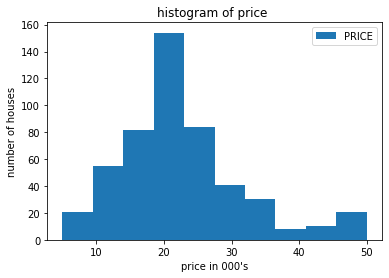

In [12]:
data.PRICE.plot(kind='hist', legend= True)
plt.xlabel('price in 000\'s'); plt.ylabel('number of houses'); plt.title('histogram of price ');

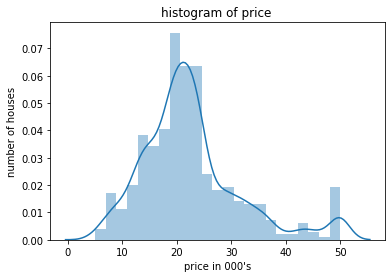

In [13]:
sns.distplot(data.PRICE, kde=True)
plt.xlabel('price in 000\'s'); plt.ylabel('number of houses') ; plt.title('histogram of price ') ;

are the above two graphs same ? yes they are , bin size matters when plotting histograms 

## how each variable is related to 'PRICE' ?

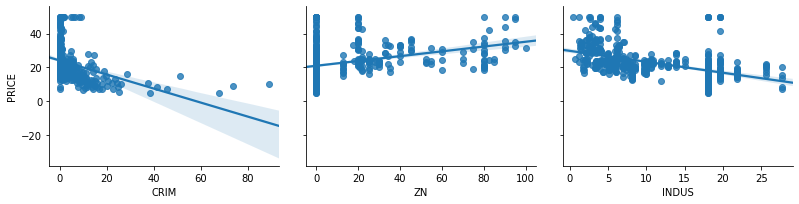

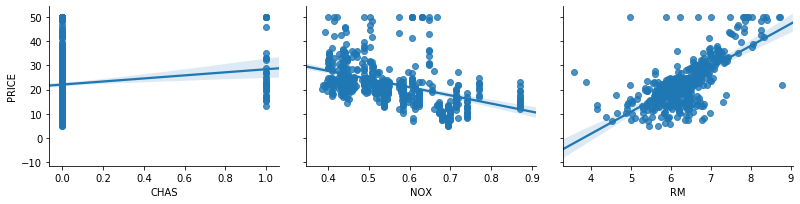

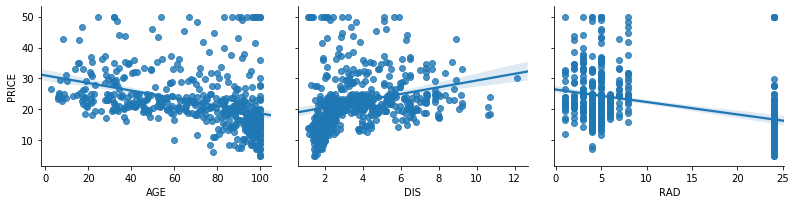

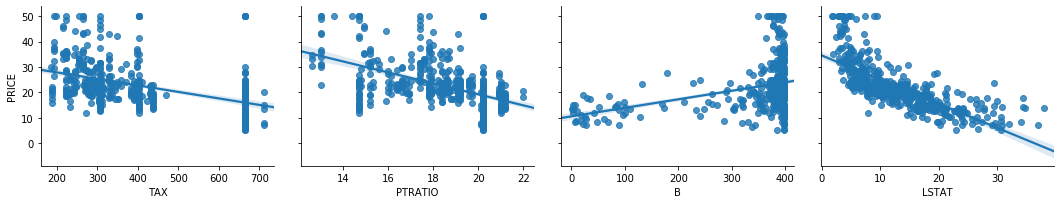

In [14]:
sns.pairplot(data, x_vars=['CRIM', 'ZN', 'INDUS'], y_vars=['PRICE'],height=3,aspect=1.25, kind='reg');
sns.pairplot(data, x_vars=['CHAS', 'NOX', 'RM'], y_vars=['PRICE'],height=3,aspect=1.25,kind='reg');
sns.pairplot(data, x_vars=['AGE', 'DIS', 'RAD'], y_vars=['PRICE'],height=3,aspect=1.25,kind='reg');
sns.pairplot(data, x_vars=['TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars=['PRICE'],height=3,aspect=1.25,kind='reg');

## A good habbit is 1. Always plot your data for first glance to human interpretation  2. Always plot heat map for machine interpretation

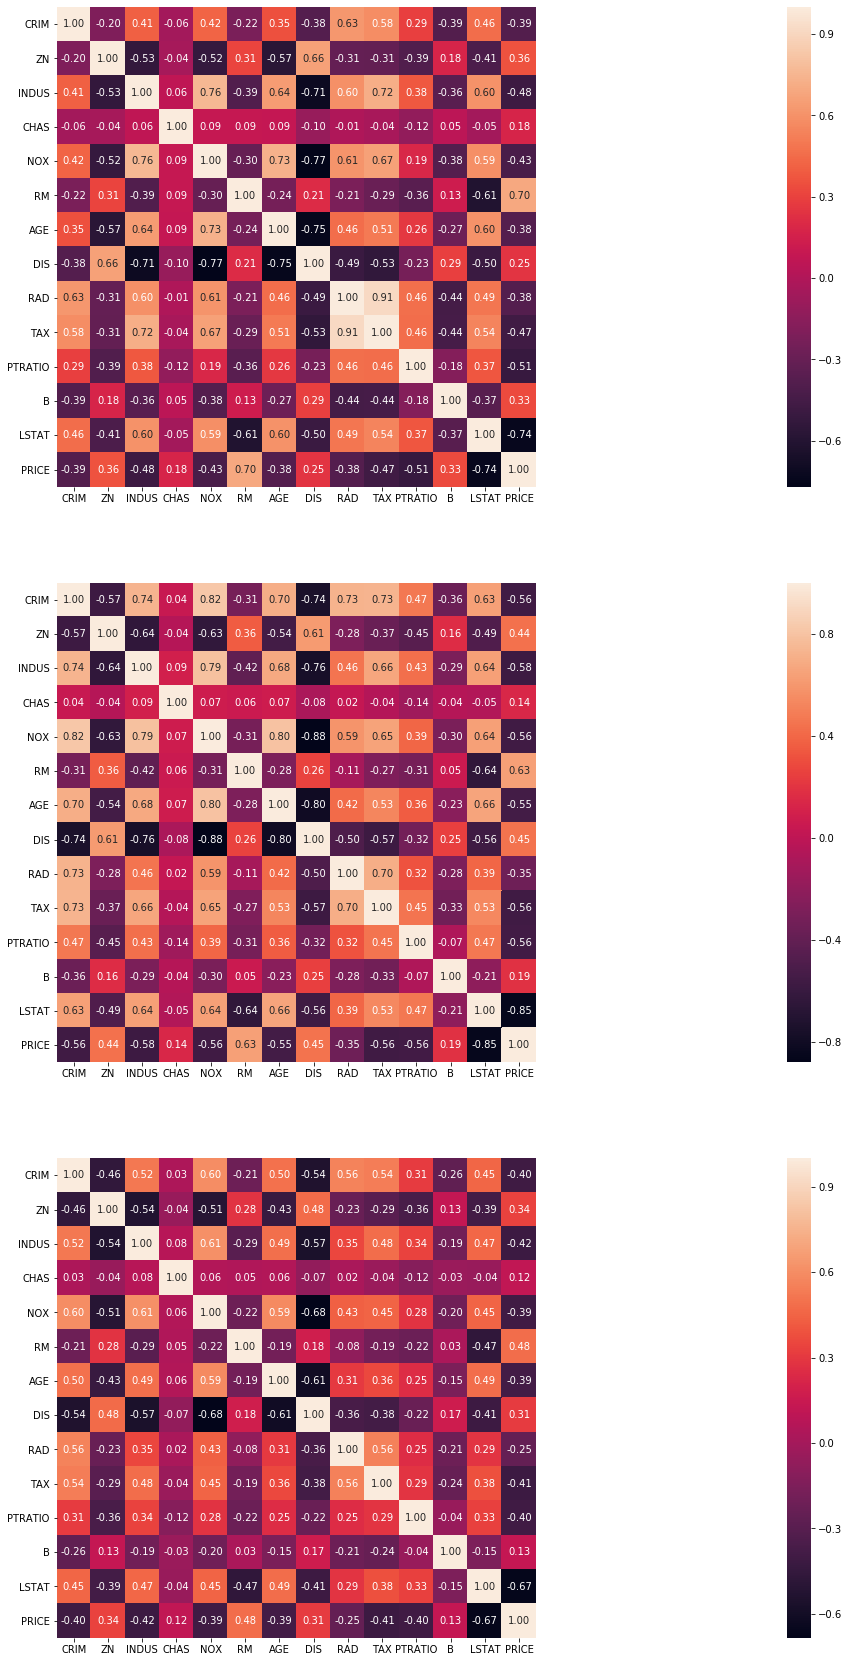

In [15]:
corr_list = [data.corr(method='pearson'),data.corr(method='spearman'),data.corr(method='kendall') ]

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(90,30))

for index, ax in enumerate(ax):
    _ = sns.heatmap(corr_list[index], annot=True, fmt='0.2f', square =  True , ax = ax);
    


we see that RM- average number of rooms per dwelling is influencing the price somewhat

# analysis of individual data distribution 

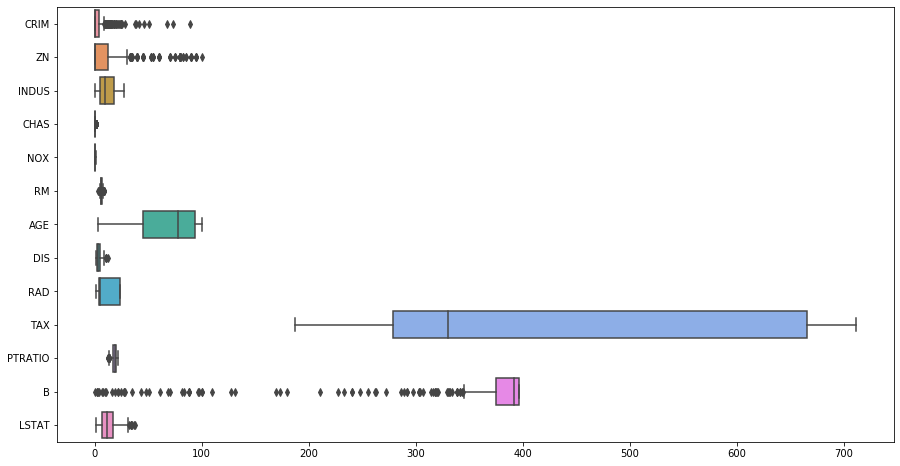

In [16]:
f,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data= features, orient='h');

## analysing categorical variables
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

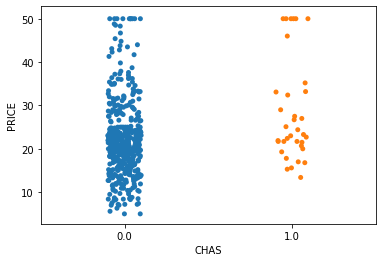

In [17]:
sns.stripplot(x='CHAS',y='PRICE',data= data);

## how jointplot with RM looks like

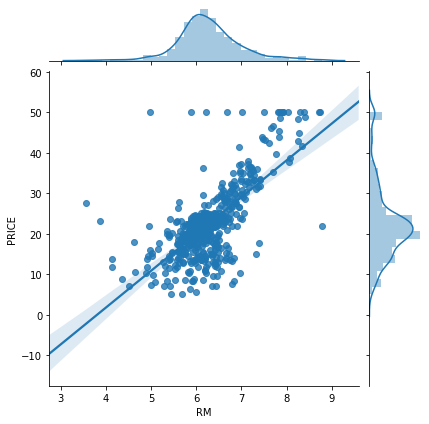

In [18]:
sns.jointplot(x = data.RM, y= data.PRICE, kind='reg') ;
# there is a clear linear relationship with narrow confidence intervals around mean

In [19]:
data.RM.mean() # avg number of rooms seems suspiciously big , well america is a country of big houses 

6.284634387351779

The below violin plot shows the count weighted distribution of CHAS and the price variation 

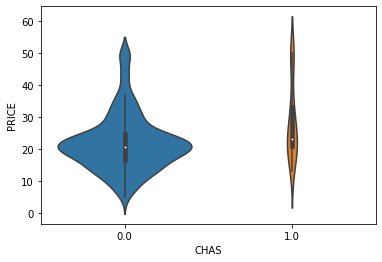

In [20]:
sns.violinplot(x='CHAS', y='PRICE',scale= 'count', data=data) ;

as seen number of obseravtions with CHAS= 0 is more 

In [21]:
data.PRICE.loc[data.CHAS==0].kurtosis()
data.PRICE.loc[data.CHAS==1].kurtosis()
data.PRICE.loc[data.CHAS==0].mean()
data.PRICE.loc[data.CHAS==1].mean()

1.541368901585145

-0.4372403786463952

22.093842887473464

28.439999999999998

If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails)
so PRICE is more distributed around mean and roughly the house that tract bounds river is 6,000 dollors more priced than the house which does not! , also since the number of houses across river side is less in number it makes difficult to compare.

# Regression : Train the model

In [22]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

## normalize the features 

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)
normalised_X = pandas.DataFrame(scaled_X, columns=list(features.columns.values))
normalised_X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.180,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
5,0.000264,0.000,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026
6,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.402923,0.173913,0.236641,0.276596,0.996722,0.295254
7,0.001554,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684
8,0.002303,0.125,0.271628,0.0,0.286008,0.396628,1.000000,0.450354,0.173913,0.236641,0.276596,0.974104,0.778146
9,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,0.276596,0.974305,0.424117


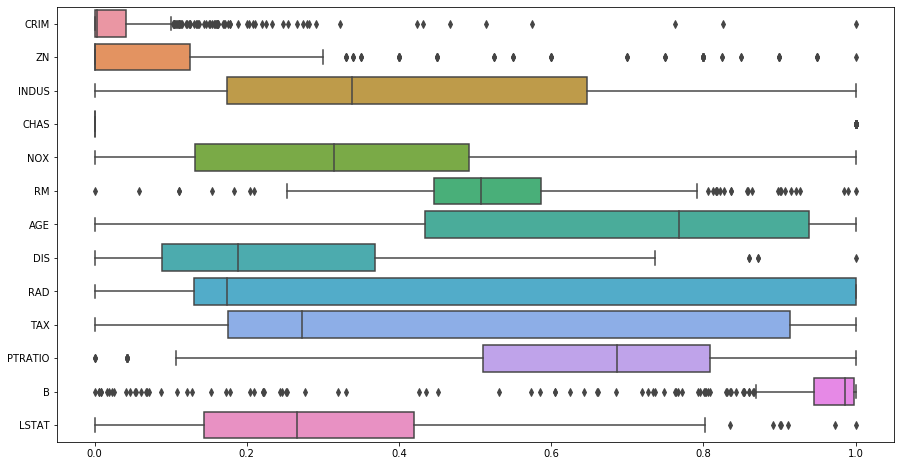

In [24]:
f,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data= normalised_X, orient='h');

we can see normalization effect in above picture

## split the dataset for training and testing

In [25]:
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.10

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size, random_state = 42)

X_train.shape 
y_train.shape
X_test.shape
y_test.shape

(455, 13)

(455,)

(51, 13)

(51,)

# lets do all kinds of regression known to mankind 

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# user variables to tune
folds   = 20
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()



In [28]:
for model_name in models:
    best_model = models[model_name]
    _= best_model.fit(X_train, y_train) # using a temp to supress un wanted output in the interactive shell
    predictions = best_model.predict(X_test)
    display ("{}: MSE : {}".format(model_name, round(mean_squared_error(y_test, predictions), 3)))


'Linear: MSE : 14.996'

'Lasso: MSE : 46.408'

'ElasticNet: MSE : 52.366'

'KNN: MSE : 8.036'

'DecisionTree: MSE : 9.541'

'SVR: MSE : 30.12'

'AdaBoost: MSE : 8.415'

'GradientBoost: MSE : 4.931'

'RandomForest: MSE : 8.093'

'ExtraTrees: MSE : 6.725'

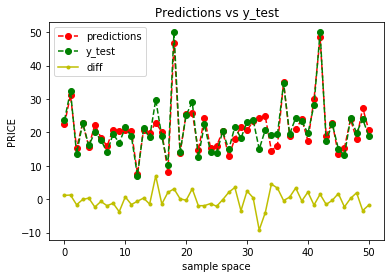

In [29]:
import numpy
diff= y_test- predictions
x_axis = numpy.arange(0,predictions.shape[0])
plt.plot(x_axis, predictions,linestyle="--", marker="o", alpha=1, color='r', label="predictions");
plt.plot(x_axis,y_test, linestyle="--", marker="o", alpha=1, color='g', label="y_test");
plt.plot(x_axis,diff, linestyle="-", marker=".", alpha=1, color='y', label="error");
plt.ylabel('PRICE');
plt.xlabel('sample space');
plt.title('Predictions vs y_test');
plt.legend(loc='best');


 References: 
 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html 
 https://github.com/scikit-learn/scikit-learn/blob/7813f7efb/sklearn/datasets/base.py#L685          
 https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html
 https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
 https://gogul09.github.io/software/regression-example-boston-housing-prices#dependencies
